### Challenge Set 3

Topic:        Linear splitting

Date:         07/23/2016

Name:         Sravanthi Ponnana


In [2]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

In [3]:
movies = pd.read_csv("2013_movies.csv")

### Challenge 1

In [6]:
movies["constant"] = 1
y, X = dmatrices('DomesticTotalGross ~ constant', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sat, 23 Jul 2016   Prob (F-statistic):                nan
Time:                        10:12:43   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.0

------------------
----------------
The model predicts the mean of the response variable .i.e, Domestic Total Gross. Since, the model does not explain any variance in the response variable, the R-squared is zero

In [7]:
pred = res.predict(X)

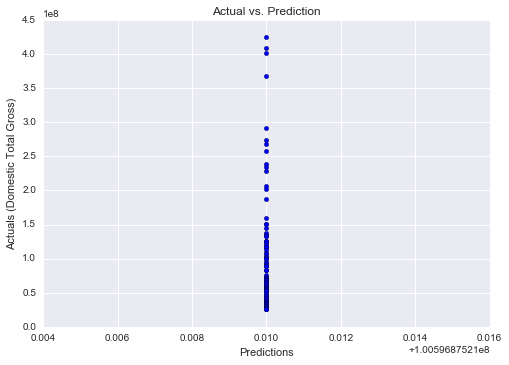

In [11]:
plt.scatter(pred,y)
plt.xlabel("Predictions")
plt.ylabel("Actuals (Domestic Total Gross)")
plt.title("Actual vs. Prediction")

Since the model predicts mean of the response variable for all values, we have a vertical line of predictions against the actuals

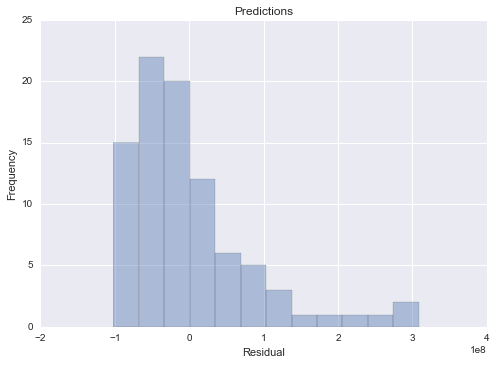

In [39]:
ax = sns.distplot(movies["DomesticTotalGross"] - pred, kde=False)
ax.set(xlabel='Residual', ylabel='Frequency',title = "Predictions")


The graph is right skewed. 

### Challenge 2

In [17]:
y, X = dmatrices('DomesticTotalGross ~ constant + Budget', data=movies)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())
pred = res.predict(X)

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           6.80e-08
Time:                        10:23:59   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.0

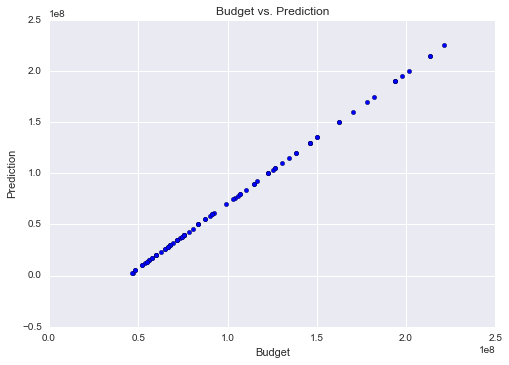

In [32]:
plt.scatter(pred, movies.Budget)
plt.title('Budget vs. Prediction')
plt.xlabel('Budget')
plt.ylabel('Prediction')
plt.show()


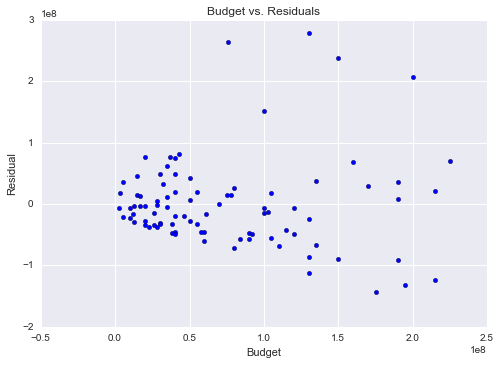

In [33]:
plt.scatter(movies.Budget, pl)
plt.title('Budget vs. Residuals')
plt.xlabel('Budget')
plt.ylabel('Residual')
plt.show()

The residuals also increase with the budget. This is because the model predicts increasing domestic gross with increasing budget  which is not true per the data 

### Challenge 3

In [35]:
y, X = dmatrices('DomesticTotalGross ~ constant + Rating', data=movies)
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())
pred = res.predict(X)

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.180
Date:                Sat, 23 Jul 2016   Prob (F-statistic):             0.0465
Time:                        10:35:02   Log-Likelihood:                -1749.9
No. Observations:                  89   AIC:                             3506.
Df Residuals:                      86   BIC:                             3513.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        6.557e+07    1.1e+07     

In [38]:
movies["Rating"].value_counts()

PG-13    41
R        33
PG       15
Name: Rating, dtype: int64

There are three categories of ratings. The category 'PG' is taken as the reference and is coded as 0.

### Challenge 4

In [37]:
y, X = dmatrices('DomesticTotalGross ~ Rating + Runtime + Budget', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Sat, 23 Jul 2016   Prob (F-statistic):           3.77e-06
Time:                        10:35:49   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        4.255e+06   5.17e+07     

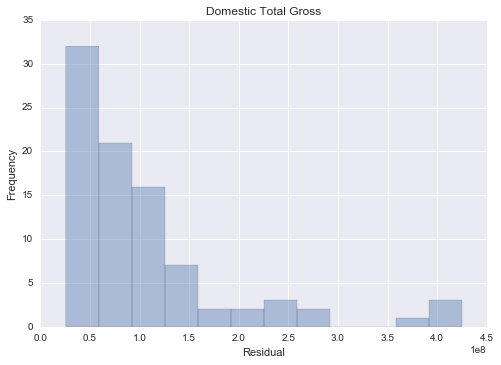

In [40]:
ax = sns.distplot(movies["DomesticTotalGross"], kde=False)
ax.set(xlabel='Residual', ylabel='Frequency',title = "Domestic Total Gross")

Since the graph is right skewed, we apply log transformation on the variable

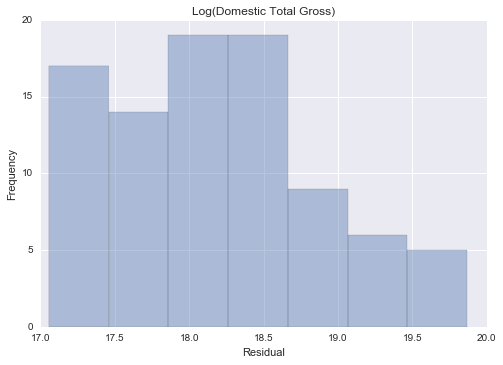

In [43]:
movies['log_DomesticTotalGross'] = np.log(movies.DomesticTotalGross)
ax = sns.distplot(movies["log_DomesticTotalGross"], kde=False)
ax.set(xlabel='Residual', ylabel='Frequency',title = "Log(Domestic Total Gross)")

We did take care of the skewness of the data to an extent

In [48]:
y, X = dmatrices('log_DomesticTotalGross ~ Rating + Runtime + Budget', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.318
Model:                                OLS   Adj. R-squared:                  0.285
Method:                     Least Squares   F-statistic:                     9.788
Date:                    Sat, 23 Jul 2016   Prob (F-statistic):           1.51e-06
Time:                            10:46:45   Log-Likelihood:                -78.450
No. Observations:                      89   AIC:                             166.9
Df Residuals:                          84   BIC:                             179.3
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
In

Applying log transformation seems to have improved the model. We might need some more features to better explain the response variable

### Challenge 5

In [49]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)

In [50]:
model.coef_

array([[  0.00000000e+00,  -2.44721584e-01,  -2.44885947e-01,
          5.79406156e-03,   5.90735919e-09]])

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,pred))

0.253206977243


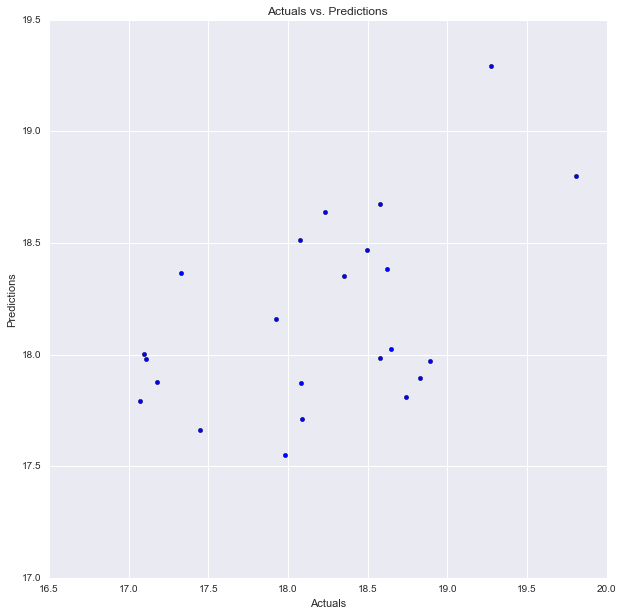

In [61]:
plt.scatter(y_test, pred)
plt.title('Actuals vs. Predictions')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.show()